In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df =  pd.read_csv("final_dataset.csv")

<ipython-input-5-12ad90116f89>:1: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv("final_dataset.csv")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152552 entries, 0 to 152551
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   HHID                             152552 non-null  int64  
 1   Per_serialno                     152552 non-null  float64
 2   Sector                           152552 non-null  int64  
 3   HH_Computer                      152552 non-null  int64  
 4   Member_internet                  152552 non-null  int64  
 5   HH_Con_exp_rs                    152552 non-null  int64  
 6   Any_HH_member_3_35yrs_attnd_edu  152552 non-null  int64  
 7   Scholarship_stipend              152552 non-null  float64
 8   Age                              122931 non-null  float64
 9   Gender                           122931 non-null  float64
 10  Operate_computer_age_5yrs        120695 non-null  float64
 11  Operate_internet_age_5yrs        120695 non-null  float64
 12  Di

In [7]:
df['Taking_pvt_coaching'].value_counts(normalize=True) * 100


,proportion
Taking_pvt_coaching,
0.0,82.020557
1.0,17.979443


In [8]:
categoricals =  [
    'HH_Computer', 'Member_internet', 'Any_HH_member_3_35yrs_attnd_edu',
    'Scholarship_stipend', 'Taking_pvt_coaching', 'Operate_computer_age_5yrs',
    'Operate_internet_age_5yrs', 'Disability_crtificate',
    'Household_size_category', 'HH_Economic_Activity_category', 'Religion_category',
    'Social_Group_Category', 'Distance_primary_category', 'Distance_upper_category',
    'Distance_secondary_category', 'Medium_instruction_grouped', 'Enrol_basic_course_grouped',
    'Edu_level_general_category', 'Edu_level_technical_category', 'Institution_category',"Sector","Gender"
]
# Convert all to categorical
df[categoricals] = df[categoricals].astype('category')


In [9]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.drop(columns=["HHID","Per_serialno"]).describe()

,HH_Con_exp_rs,Age,Course_fee_amt,Books_stationery_uniform_amt
count,152552.00,122931.00,130046.00,150577.00
mean,12701.98,13.59,13178.88,2466.44
std,8839.24,5.31,27578.31,2999.19
min,120.00,3.00,0.00,0.00
25%,7080.00,9.00,500.00,800.00
50%,10000.00,14.00,4000.00,1700.00
75%,15250.00,18.00,14500.00,3000.00
max,208000.00,35.00,1700000.00,175000.00


#Univariate + Bivariate Analysis of Numerical Features

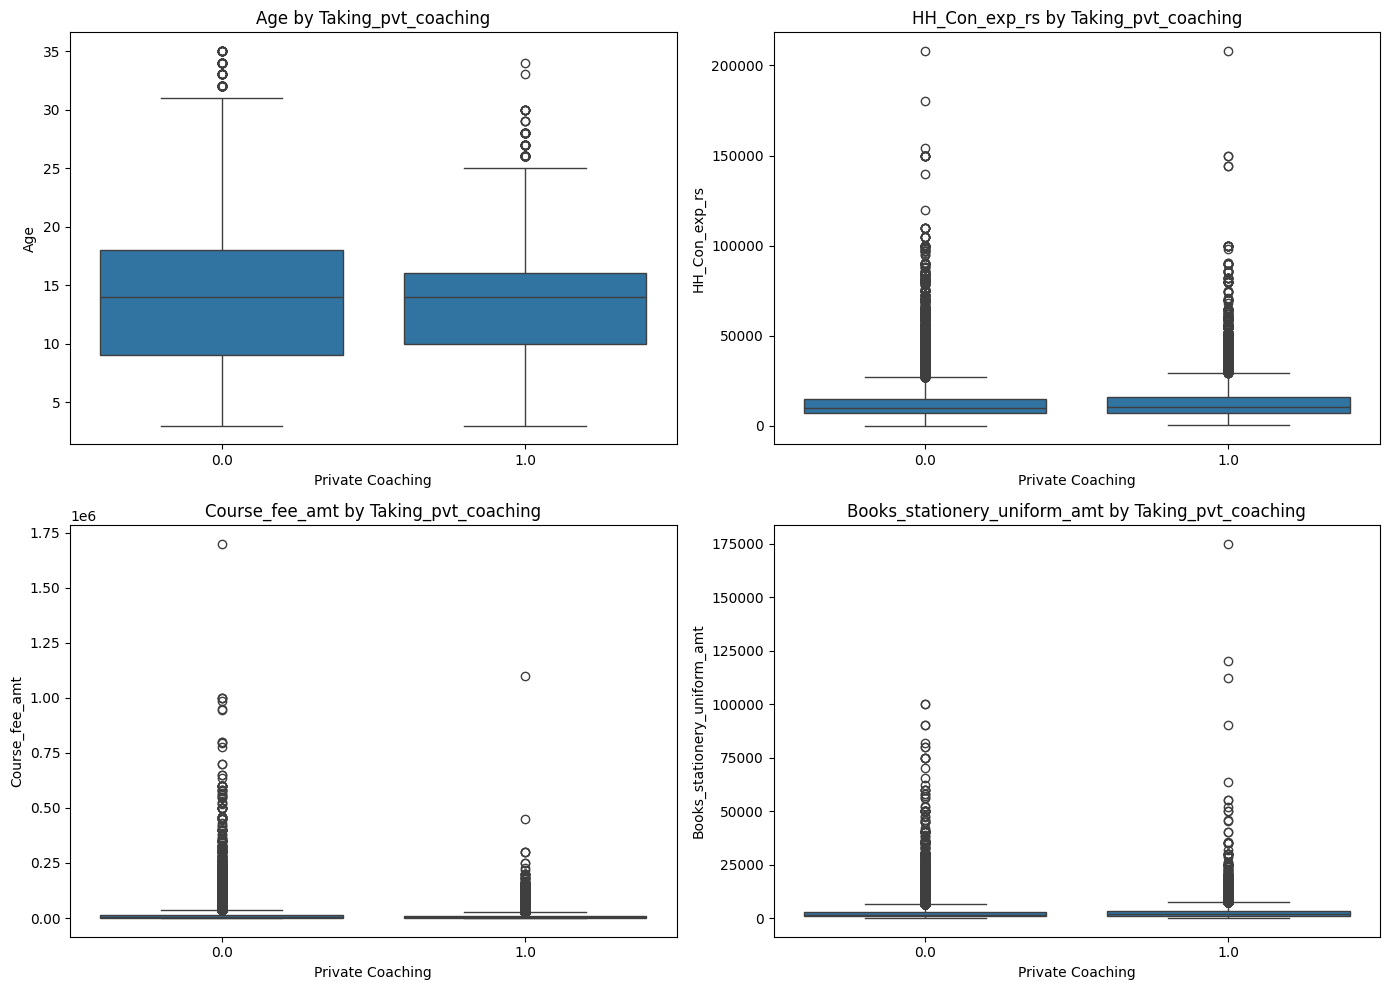

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = ['Age', 'HH_Con_exp_rs', 'Course_fee_amt', 'Books_stationery_uniform_amt']
target_var = 'Taking_pvt_coaching'

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    sns.boxplot(data=df, x=target_var, y=var, ax=axes[i])
    axes[i].set_title(f"{var} by {target_var}")
    axes[i].set_xlabel("Private Coaching")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()



## Is the proportion of coaching takers significantly different across categories?

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical variables
categorical_vars = [
    'HH_Computer', 'Member_internet', 'Any_HH_member_3_35yrs_attnd_edu',
    'Scholarship_stipend', 'Operate_computer_age_5yrs', 'Operate_internet_age_5yrs',
    'Disability_crtificate', 'Household_size_category', 'HH_Economic_Activity_category',
    'Religion_category', 'Social_Group_Category', 'Distance_primary_category',
    'Distance_upper_category', 'Distance_secondary_category', 'Medium_instruction_grouped',
    'Enrol_basic_course_grouped', 'Edu_level_general_category', 'Edu_level_technical_category',
    'Institution_category', 'Sector', 'Gender'
]

# Target variable
target_var = 'Taking_pvt_coaching'

# Function to create count plots
def bivariate_categorical_vs_target(df, categorical_vars, target_var):
    for var in categorical_vars:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=var, hue=target_var)
        plt.title(f"{var} by {target_var}")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Example usage:


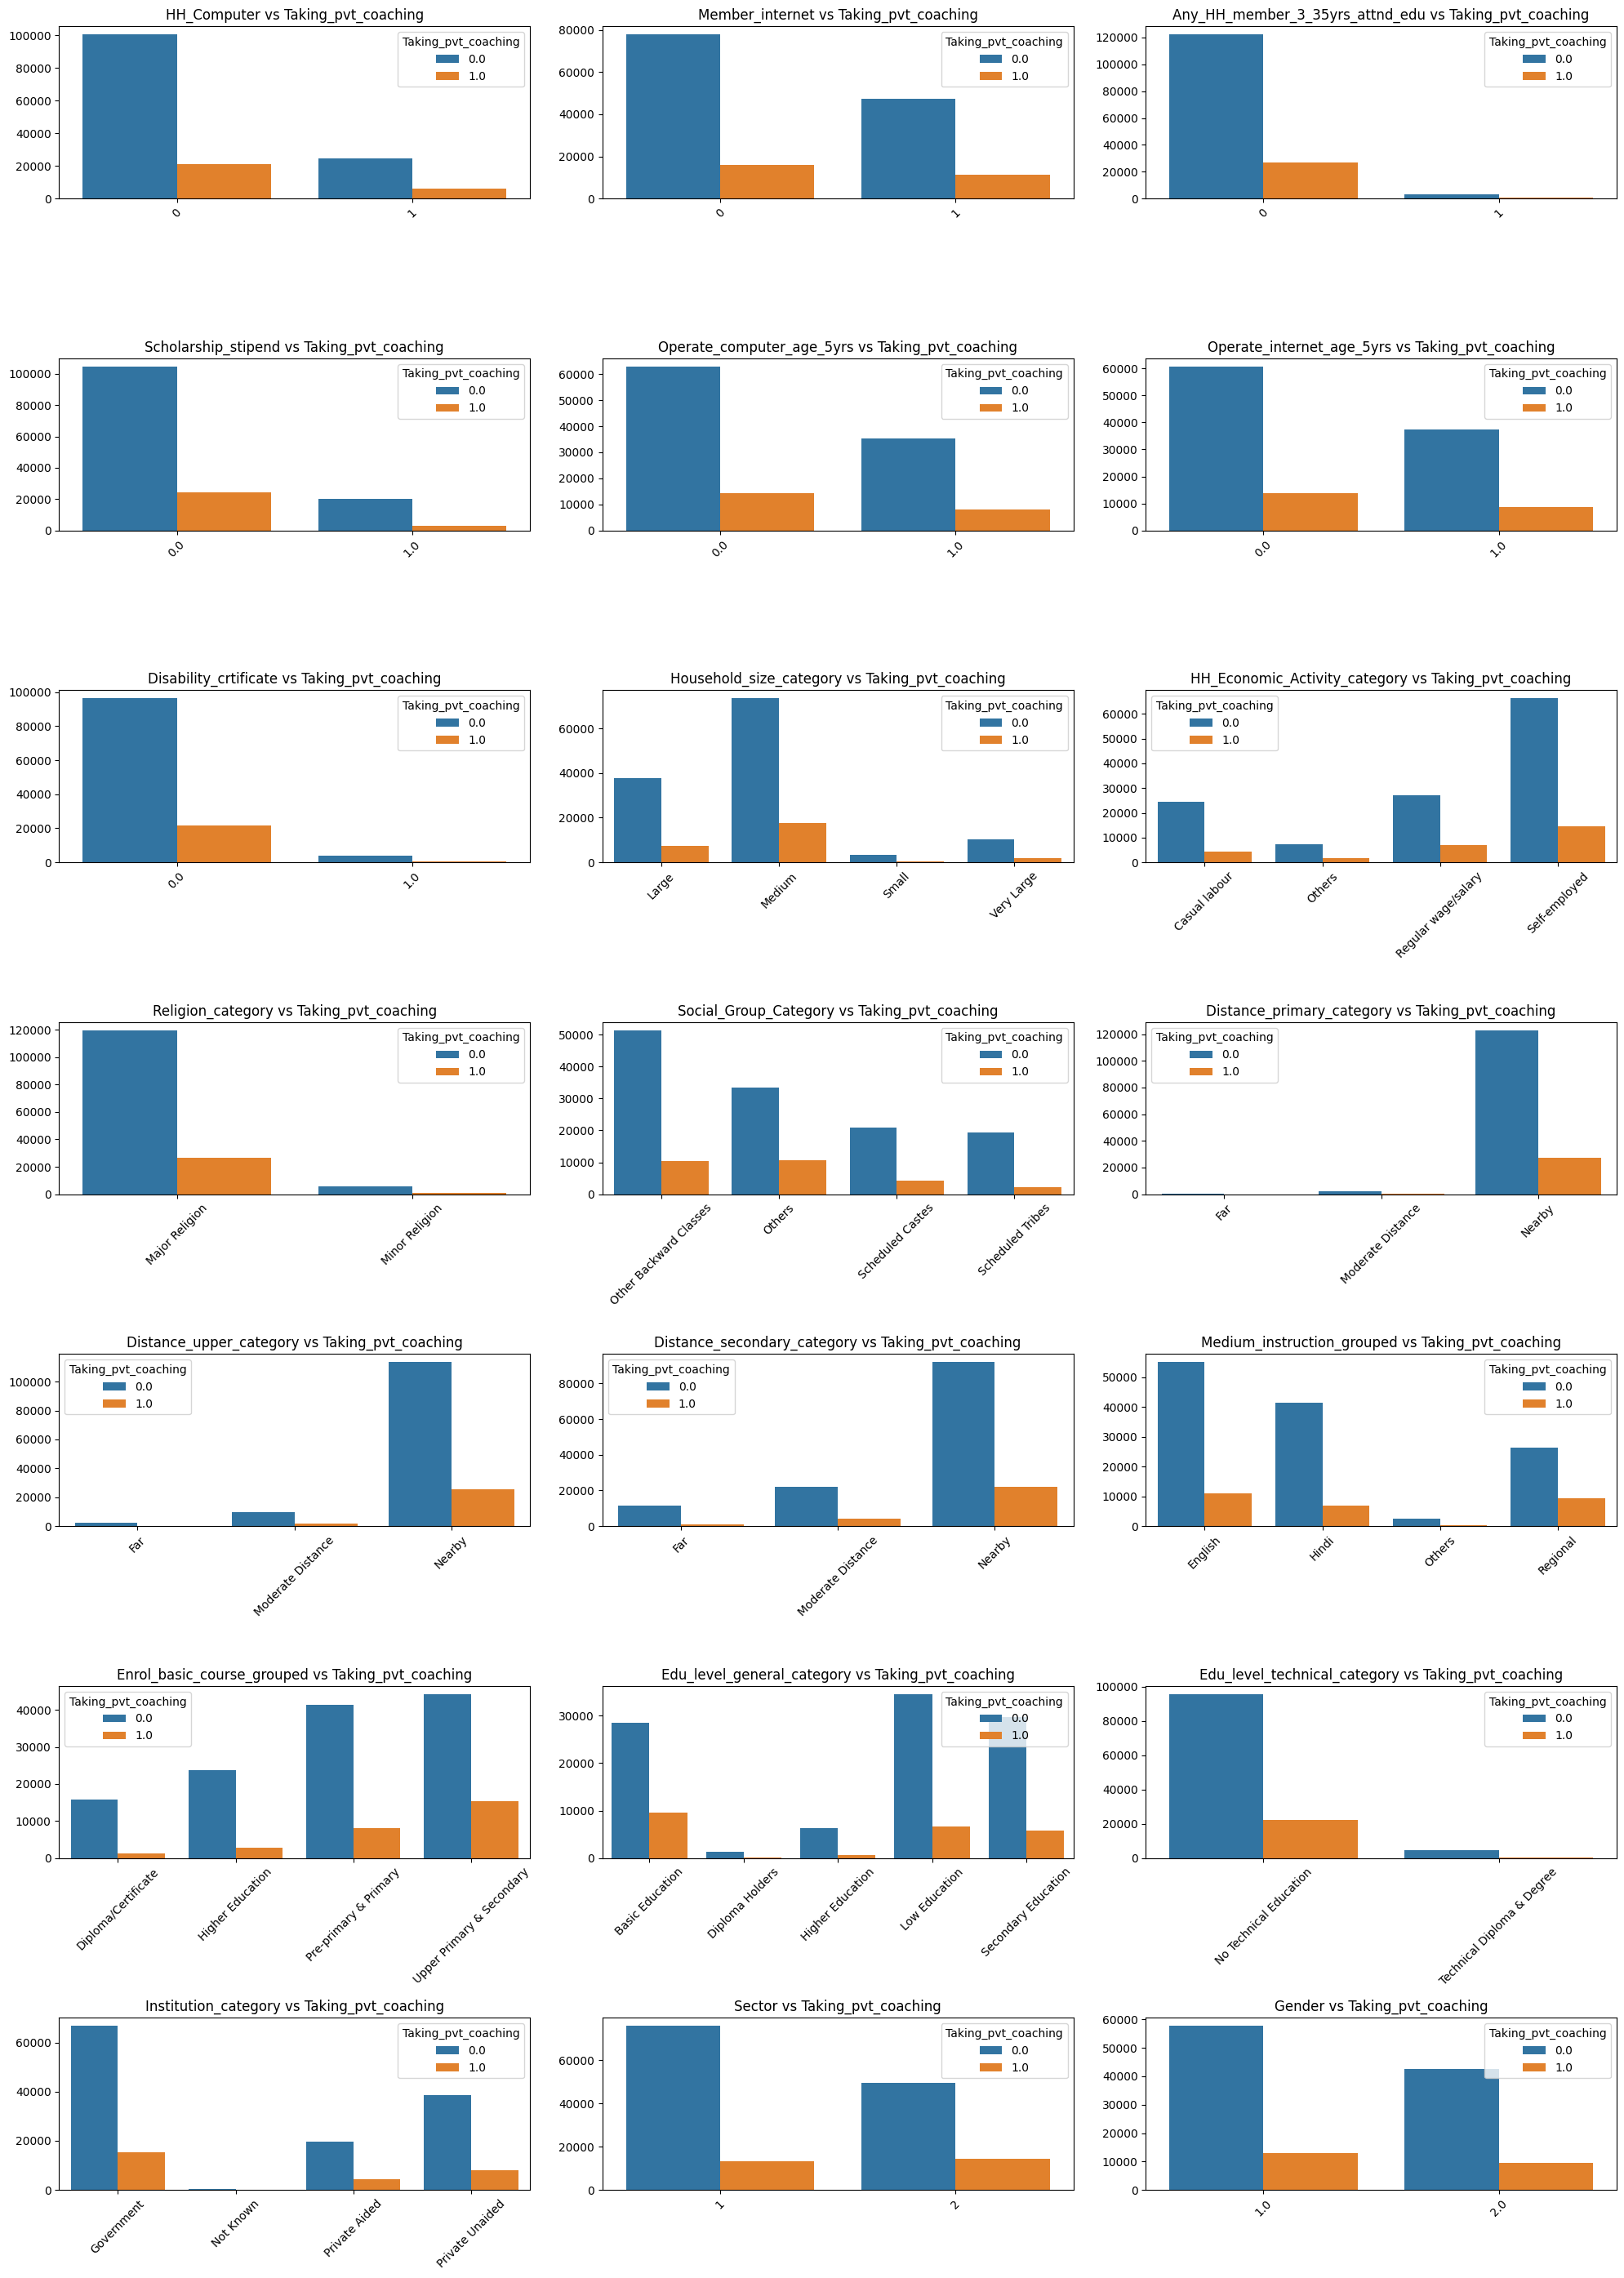

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of categorical variables
categorical_vars = [
    'HH_Computer', 'Member_internet', 'Any_HH_member_3_35yrs_attnd_edu',
    'Scholarship_stipend', 'Operate_computer_age_5yrs', 'Operate_internet_age_5yrs',
    'Disability_crtificate', 'Household_size_category', 'HH_Economic_Activity_category',
    'Religion_category', 'Social_Group_Category', 'Distance_primary_category',
    'Distance_upper_category', 'Distance_secondary_category', 'Medium_instruction_grouped',
    'Enrol_basic_course_grouped', 'Edu_level_general_category', 'Edu_level_technical_category',
    'Institution_category', 'Sector', 'Gender'
]

target_var = 'Taking_pvt_coaching'

# Define subplot grid size
n = len(categorical_vars)
cols = 3
rows = math.ceil(n / cols)

# Set figure
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

# Generate countplots
for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue=target_var, ax=axes[i])
    axes[i].set_title(f"{var} vs {target_var}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [15]:
# Function to generate percentage distribution for each categorical variable
def summarize_categorical_by_target(df, categorical_vars, target_var):
    for var in categorical_vars:
        print(f"\n▶ {var} vs {target_var}")
        summary = (
            df.groupby(var)[target_var]
            .value_counts(normalize=True)
            .unstack()
            .fillna(0)
            .apply(lambda x: (x * 100).round(2))
        )
        display(summary)


In [16]:
summarize_categorical_by_target(df, categorical_vars, 'Taking_pvt_coaching')



▶ HH_Computer vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
HH_Computer,,
0,82.50,17.50
1,80.14,19.86



▶ Member_internet vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Member_internet,,
0,82.88,17.12
1,80.65,19.35



▶ Any_HH_member_3_35yrs_attnd_edu vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Any_HH_member_3_35yrs_attnd_edu,,
0,82.04,17.96
1,81.38,18.62



▶ Scholarship_stipend vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Scholarship_stipend,,
0.00,81.19,18.81
1.00,86.58,13.42



▶ Operate_computer_age_5yrs vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Operate_computer_age_5yrs,,
0.00,81.32,18.68
1.00,81.59,18.41



▶ Operate_internet_age_5yrs vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Operate_internet_age_5yrs,,
0.00,81.41,18.59
1.00,81.43,18.57



▶ Disability_crtificate vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Disability_crtificate,,
0.00,81.49,18.51
1.00,84.07,15.93



▶ Household_size_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Household_size_category,,
Large,83.96,16.04
Medium,80.56,19.44
Small,87.67,12.33
Very Large,83.90,16.10



▶ HH_Economic_Activity_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
HH_Economic_Activity_category,,
Casual labour,84.99,15.01
Others,81.69,18.31
Regular wage/salary,79.43,20.57
Self-employed,82.10,17.90



▶ Religion_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Religion_category,,
Major Religion,81.89,18.11
Minor Religion,84.86,15.14



▶ Social_Group_Category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Social_Group_Category,,
Other Backward Classes,83.15,16.85
Others,75.98,24.02
Scheduled Castes,83.41,16.59
Scheduled Tribes,89.42,10.58



▶ Distance_primary_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Distance_primary_category,,
Far,78.49,21.51
Moderate Distance,85.27,14.73
Nearby,81.97,18.03



▶ Distance_upper_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Distance_upper_category,,
Far,91.56,8.44
Moderate Distance,83.61,16.39
Nearby,81.72,18.28



▶ Distance_secondary_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Distance_secondary_category,,
Far,90.41,9.59
Moderate Distance,83.84,16.16
Nearby,80.68,19.32



▶ Medium_instruction_grouped vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Medium_instruction_grouped,,
English,83.38,16.62
Hindi,85.87,14.13
Others,87.62,12.38
Regional,73.82,26.18



▶ Enrol_basic_course_grouped vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Enrol_basic_course_grouped,,
Diploma/Certificate,92.99,7.01
Higher Education,89.25,10.75
Pre-primary & Primary,83.82,16.18
Upper Primary & Secondary,74.20,25.80



▶ Edu_level_general_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Edu_level_general_category,,
Basic Education,74.81,25.19
Diploma Holders,88.39,11.61
Higher Education,91.89,8.11
Low Education,83.98,16.02
Secondary Education,83.83,16.17



▶ Edu_level_technical_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Edu_level_technical_category,,
No Technical Education,81.22,18.78
Technical Diploma & Degree,90.31,9.69



▶ Institution_category vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Institution_category,,
Government,81.44,18.56
Not Known,79.20,20.80
Private Aided,82.17,17.83
Private Unaided,83.00,17.00



▶ Sector vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Sector,,
1,85.15,14.85
2,77.65,22.35



▶ Gender vs Taking_pvt_coaching


<ipython-input-15-96fdb288ab86>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(var)[target_var]


Taking_pvt_coaching,0.00,1.00
Gender,,
1.00,81.53,18.47
2.00,81.66,18.34


In [29]:
categoricals = df.drop(columns = ["Taking_pvt_coaching",'Age', 'Course_fee_amt',
                     'Books_stationery_uniform_amt',"HH_Con_exp_rs","HHID","Per_serialno"])

for col in categoricals:
    print(df.groupby(col)['Taking_pvt_coaching'].mean().sort_values())


Sector
1    0.148549
2    0.223498
Name: Taking_pvt_coaching, dtype: float64
HH_Computer
0    0.175005
1    0.198641
Name: Taking_pvt_coaching, dtype: float64
Member_internet
0    0.171209
1    0.193525
Name: Taking_pvt_coaching, dtype: float64
Any_HH_member_3_35yrs_attnd_edu
0    0.179640
1    0.186156
Name: Taking_pvt_coaching, dtype: float64
Scholarship_stipend
1.0    0.134245
0.0    0.188105
Name: Taking_pvt_coaching, dtype: float64
Gender
2.0    0.183360
1.0    0.184709
Name: Taking_pvt_coaching, dtype: float64
Operate_computer_age_5yrs
1.0    0.184117
0.0    0.186753
Name: Taking_pvt_coaching, dtype: float64
Operate_internet_age_5yrs
1.0    0.185718
0.0    0.185862
Name: Taking_pvt_coaching, dtype: float64
Disability_crtificate
1.0    0.159283
0.0    0.185133
Name: Taking_pvt_coaching, dtype: float64
Household_size_category
Small         0.123346
Large         0.160373
Very Large    0.161018
Medium        0.194397
Name: Taking_pvt_coaching, dtype: float64
HH_Economic_Activity_cat

No predictive power variables have to be dropped: **gender, Any_HH_member_3_35yrs_attnd_edu,
 Operate_internet_age_5yrs**


#Numerical Feature Correlation with Target

In [ ]:
# Select numerical columns
numerical_columns = ['Age', 'Course_fee_amt',
                     'Books_stationery_uniform_amt',"HH_Con_exp_rs" ]
# Summary statistics for numerical columns
summary_stats = df[numerical_columns].describe()
print(summary_stats)


                 Age  Course_fee_amt  Books_stationery_uniform_amt  \
count  126573.000000    1.265730e+05                 126573.000000   
mean       14.655487    1.334562e+04                   2735.947564   
std         5.232122    2.781913e+04                   3160.691824   
min         5.000000    0.000000e+00                      0.000000   
25%        10.000000    5.000000e+02                   1000.000000   
50%        15.000000    4.000000e+03                   2000.000000   
75%        19.000000    1.500000e+04                   3500.000000   
max        35.000000    1.700000e+06                 175000.000000   

       HH_Con_exp_rs  
count  126573.000000  
mean    13242.251657  
std      9168.389417  
min       120.000000  
25%      7500.000000  
50%     10500.000000  
75%     16000.000000  
max    208000.000000  


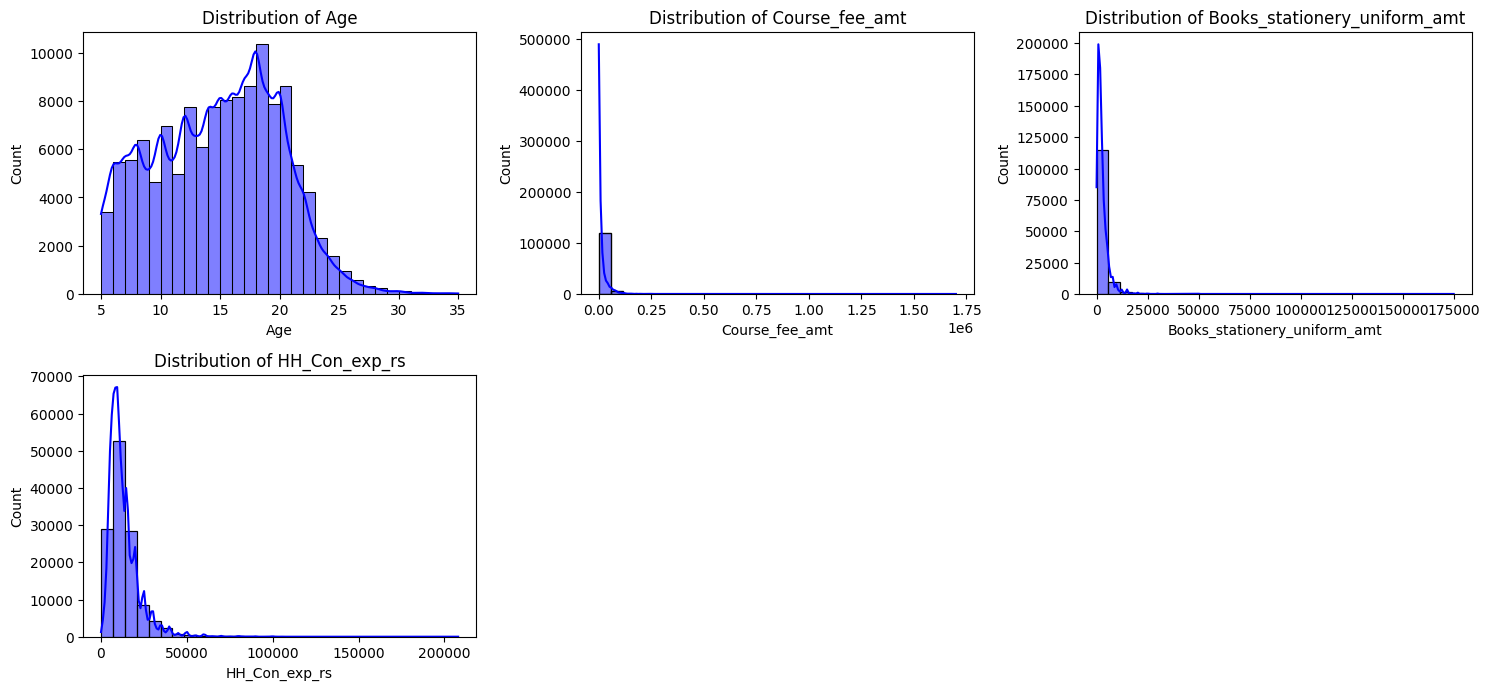

In [ ]:
# Step 1: Visualize distributions of numerical variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

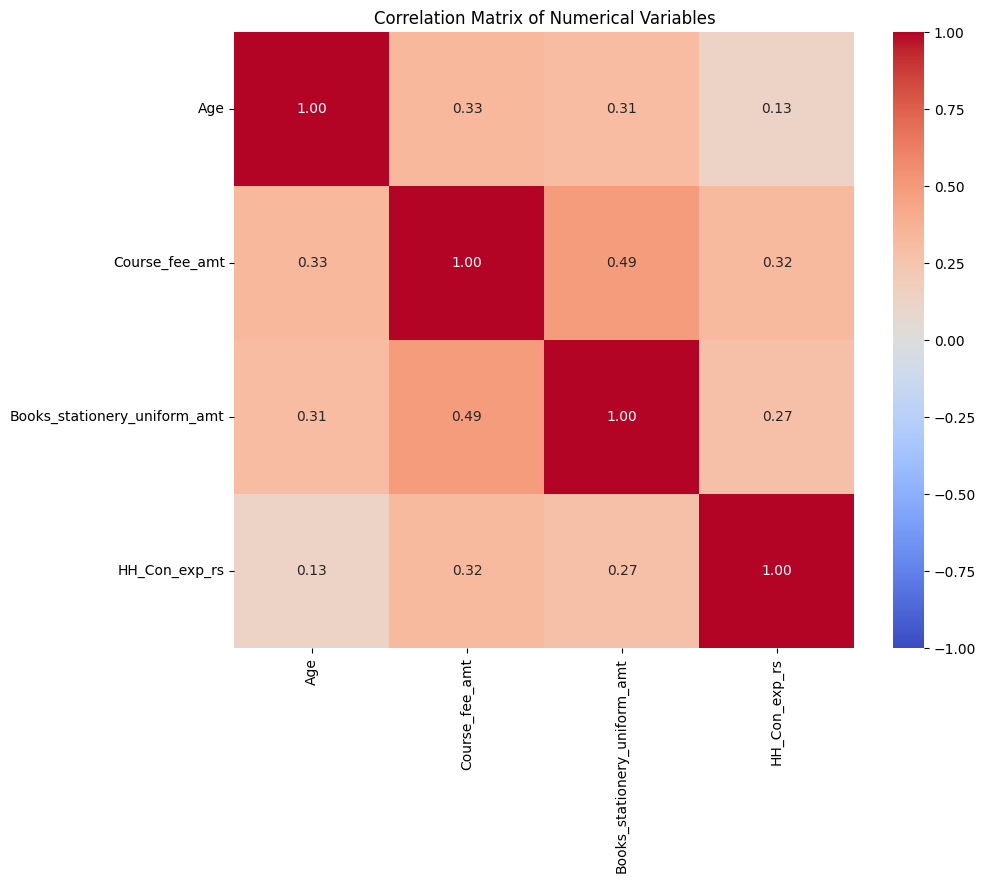

In [ ]:
# Step 2: Check correlations between numerical variables
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


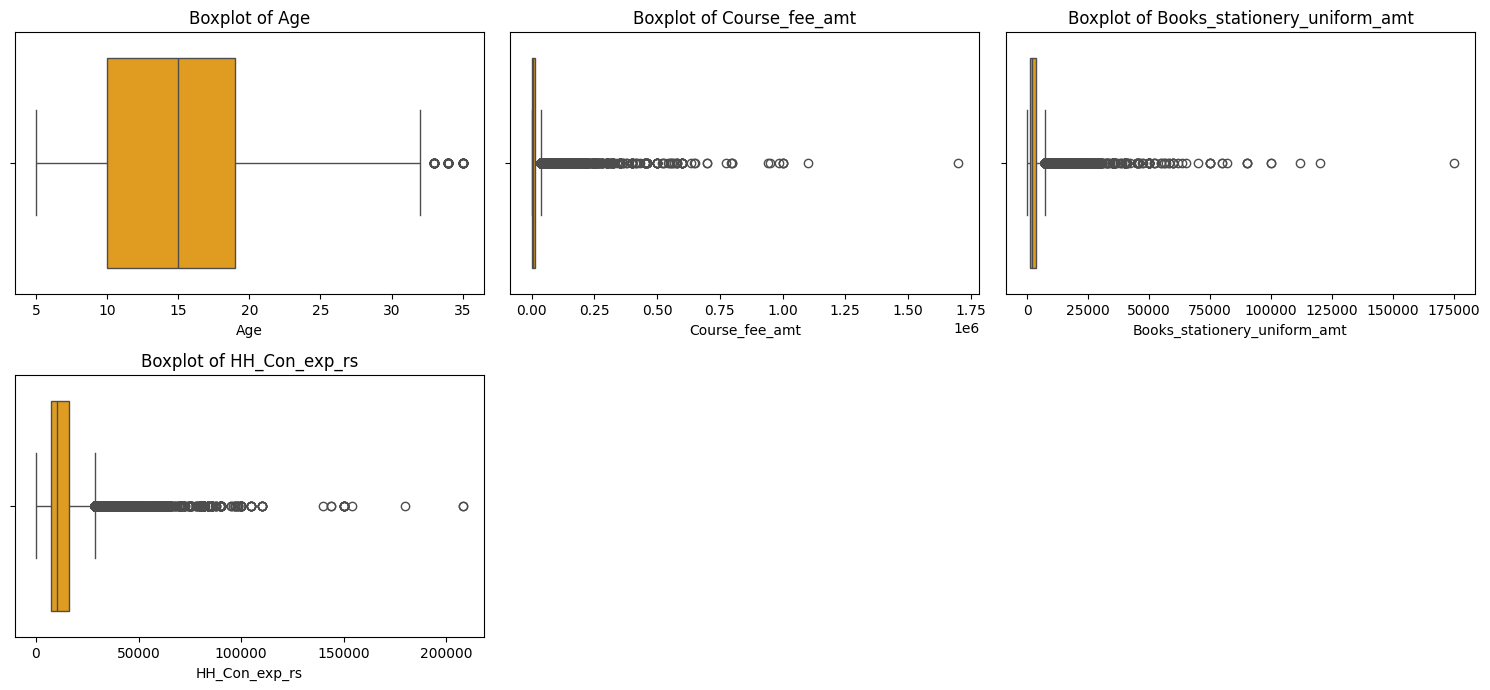

In [ ]:
# Step 3: Boxplots to identify potential outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

<ipython-input-23-2464e3ed921d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Taking_pvt_coaching', y=col, data=df, palette='Set2')
<ipython-input-23-2464e3ed921d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Taking_pvt_coaching', y=col, data=df, palette='Set2')
<ipython-input-23-2464e3ed921d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Taking_pvt_coaching', y=col, data=df, palette='Set2')
<ipython-input-23-2464e3ed921d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

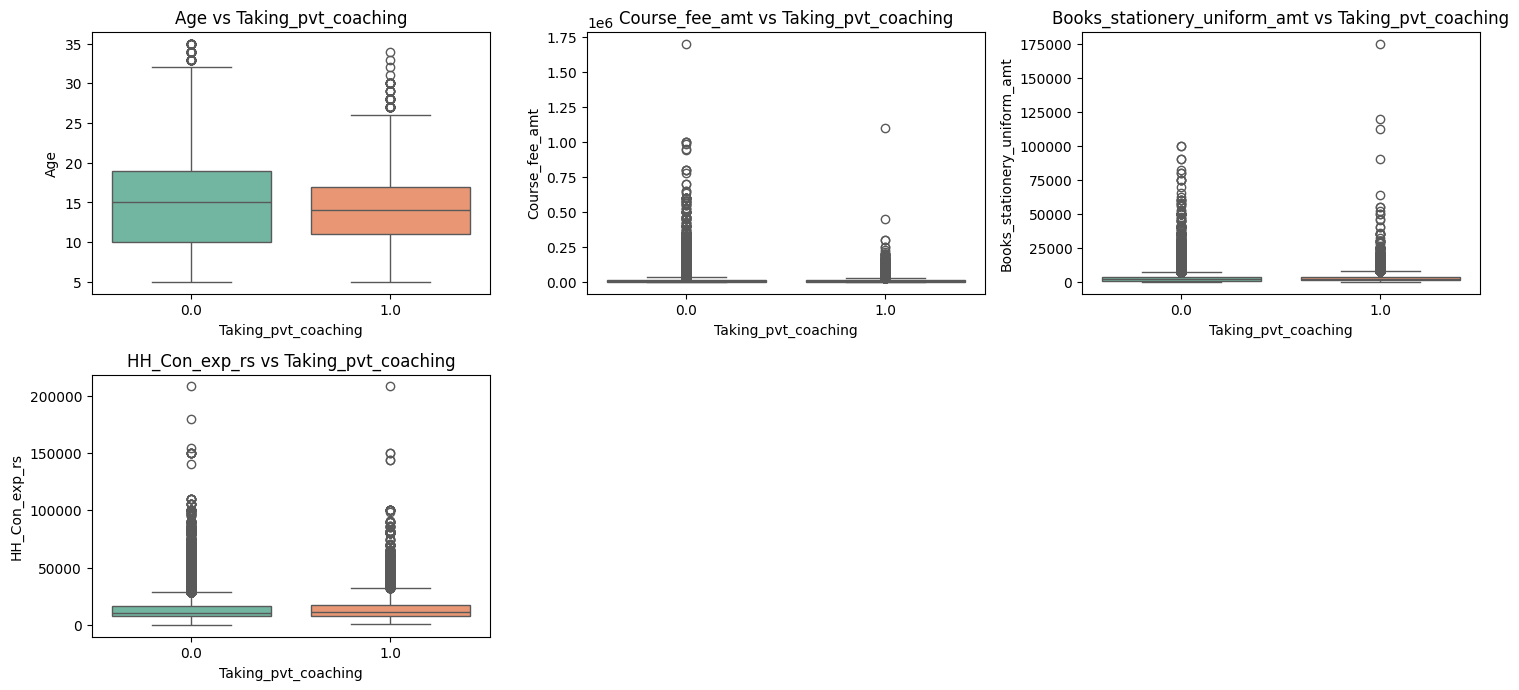

In [ ]:


# Step 4: Analyze numerical features against target variable 'Taking_pvt_coaching'
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Taking_pvt_coaching', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Taking_pvt_coaching')
    plt.tight_layout()

plt.show()